Hegselmann-Krause model
---


Simulation
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import trange

In [65]:
def model(N,steps,Er,El, seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    Er: Confidence to the right
    El: Confidence to the left
    seed : random seed
    '''
    path='./Simulation'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'The system size is: '+str(N)+'\n')
        file.write('There were '+str(steps)+' timesteps'+'\n')
        file.write('The confidence to the right is '+str(Er)+'\n')
        file.write('The confidence to the left is '+str(El)+'\n')
        file.write( 'The random seed used was: '+str(seed)+'\n')
    matrix=np.zeros([N,steps])
    np.random.seed(seed)
    matrix[:,0]=np.random.uniform(0, 1, size=N)
    for ii in trange(1,steps):
        matrix[:,ii]=np.copy(matrix[:,ii-1])
        for i in range(N):
            list=[]
            for a in range(N):
                difference=matrix[:,(ii-1)][i]-matrix[:,(ii-1)][a]
                if  (np.sign(difference)==-1 and difference>-Er) or (np.sign(difference)==1 and difference<El):
                    list.append(matrix[:,(ii-1)][a])
                if a==N-1 and len(list)!=0:
                    matrix[:,ii][i]=np.average(list)
    return matrix

In [74]:
def plotter(N,steps,Er, El,seed):
    '''
    INPUT
    N : Number of agents
    steps : number of time steps
    Er: Confidence to the right
    El: Confidence to the left
    seed : random seed
    '''
    matrix=model(N,steps,Er,El,seed)
    plt.scatter(np.zeros(N),matrix[:,0])
    for i in range (N):
        plt.plot(matrix[i,:])
        plt.ylim(0,1)
        plt.grid(True)
    plt.show()
        #plt.savefig('ttest.png')

100%|██████████| 19/19 [01:08<00:00,  3.58s/it]


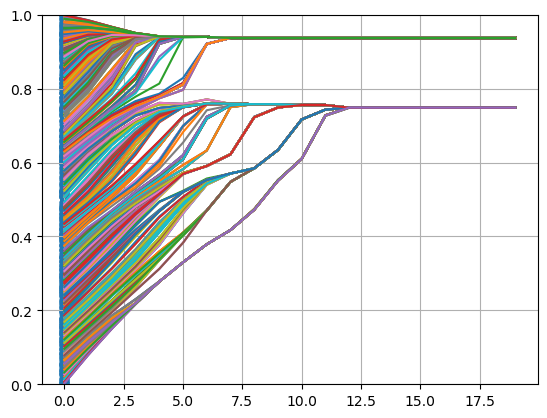

In [76]:
plotter(625,20,0.15,0.03,12)

In [2]:
###################### Model with symmetric confidence ######################
def model(N,steps,E, seed):
    matrix=np.zeros([N,steps])
    np.random.seed(seed)
    matrix[:,0]=np.random.uniform(0, 1, size=N)
    for ii in trange(1,steps):
        matrix[:,ii]=np.copy(matrix[:,ii-1])
        for i in range(N):
            list=[]
            for a in range(N):
                if  np.abs(matrix[:,(ii-1)][i]-matrix[:,(ii-1)][a])<E:
                    list.append(matrix[:,(ii-1)][a])
                if a==N-1:
                    matrix[:,ii][i]=np.average(list)
    return matrix